In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/vihallu-train.csv")
df.head()

,id,context,prompt,response,label
0,9b1ea51d-d1ff-45ba-8cf1-6a91328e8600,"Vào những năm 1870, hai nhà điêu khắc Augustus...","Vào những năm 1960, nơi nào trở thành trung tâ...",Quảng trường Washington là trung tâm của thế h...,extrinsic
1,db7a89c6-2a6a-42af-beef-58e557ecc819,Cách mạng Tháng Mười đã biến một cuộc chiến tr...,Cách mạng Tháng Mười đã khởi xướng chủ nghĩa p...,Sai. Cách mạng Tháng Mười đã đánh bại chủ nghĩ...,no
2,10fca062-d343-4eca-8434-93c7a8aa5e0e,Vị trí địa lý nằm giữa phương Đông và Địa Trun...,Dựa trên việc Đế quốc Ottoman không bao giờ ki...,Nền ẩm thực của Thổ Nhĩ Kỳ được xây dựng từ gi...,extrinsic
3,ece8eb9e-d6bb-407a-a567-d9531861c603,"Hồ Quý Ly trước có tên là Lê Quý Ly (黎季犛), biể...",Đời cháu thứ 12 của Hồ Hưng Dật sống ở đâu?,"Đời cháu thứ 12 của Hồ Hưng Dật, là Hồ Liêm, s...",no
4,b613217f-df2a-491e-8326-25811a31eb09,"Năm 2007, Bồ Đào Nha có khoảng 332.137 người n...","Từ thập niên 1990, tại sao xuất hiện một vài l...",Mặc dù Bồ Đào Nha đã đóng cửa biên giới hoàn t...,intrinsic


In [22]:
print("len(df):", len(df))

len(df): 7000


label
intrinsic    2448
extrinsic    2307
no           2245
Name: count, dtype: int64


<Axes: xlabel='label'>

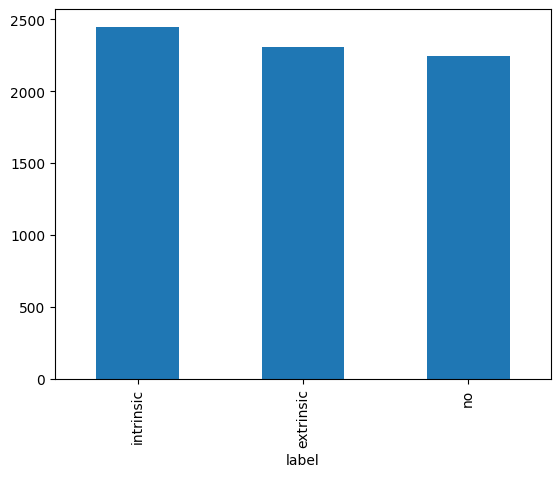

In [16]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [4]:
no_df = df[df['label'] == 'no']
intrinsic_df = df[df['label'] == 'intrinsic']
extrinsic_df = df[df['label'] == 'extrinsic']

dfs = [no_df, intrinsic_df, extrinsic_df]

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

for df_ in dfs:
    df_['num_words'] = df_['context'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['context'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['context'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

/tmp/ipykernel_89407/732922740.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

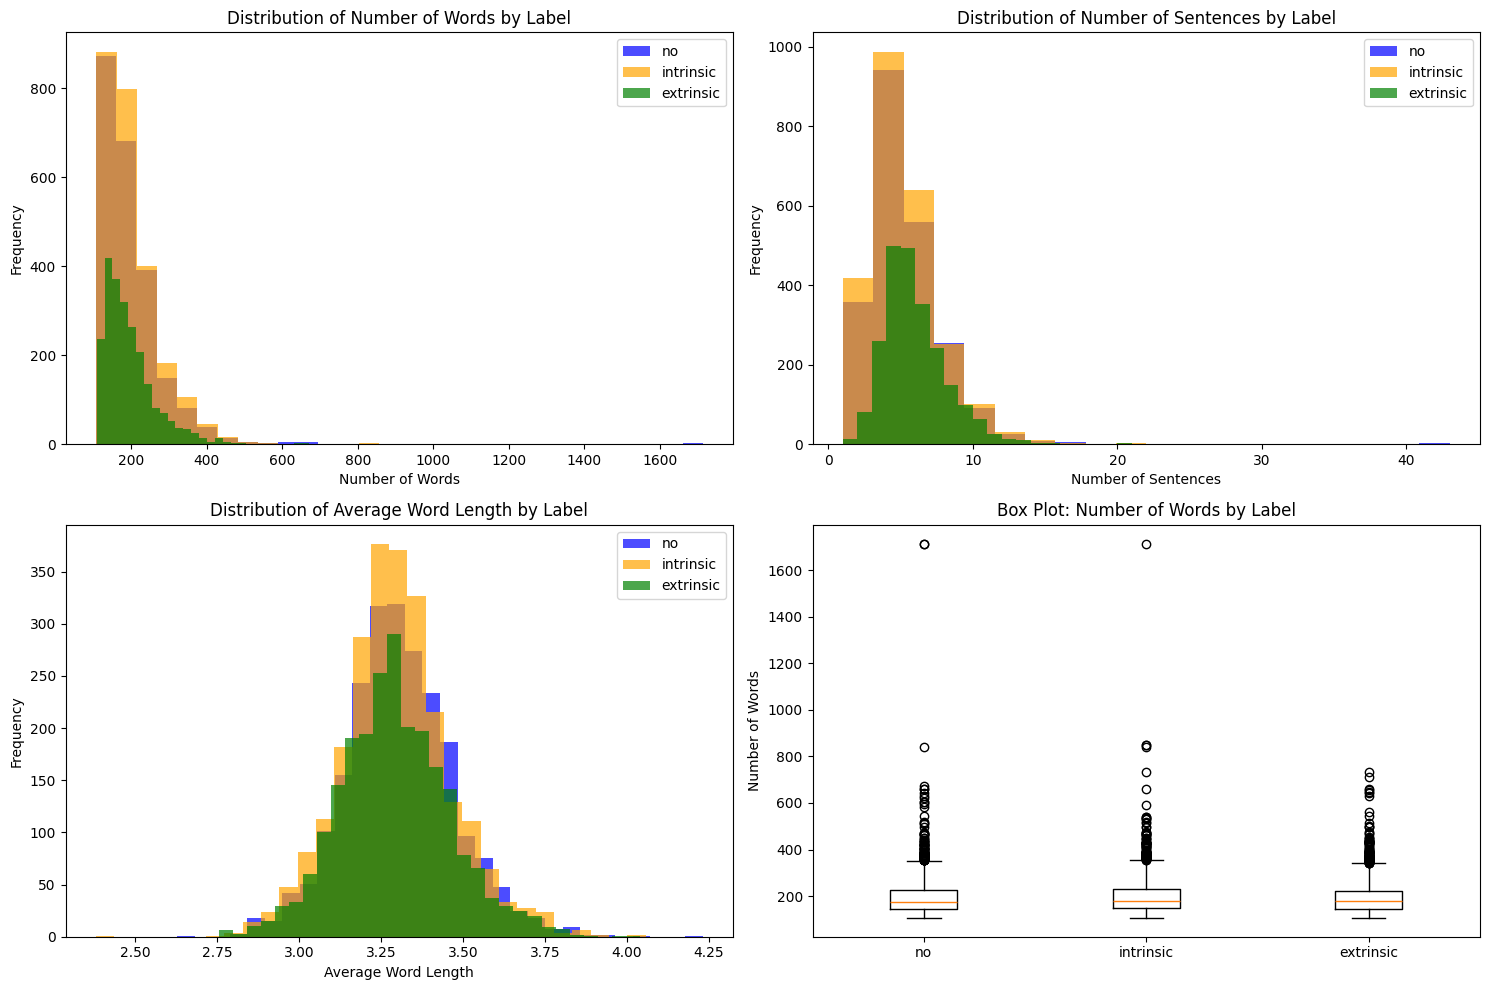

In [25]:
plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [ ]:

from nltk.tokenize import word_tokenize, sent_tokenize

for df_ in dfs:
    df_['num_words'] = df_['prompt'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['prompt'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['prompt'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

/tmp/ipykernel_92545/799315163.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

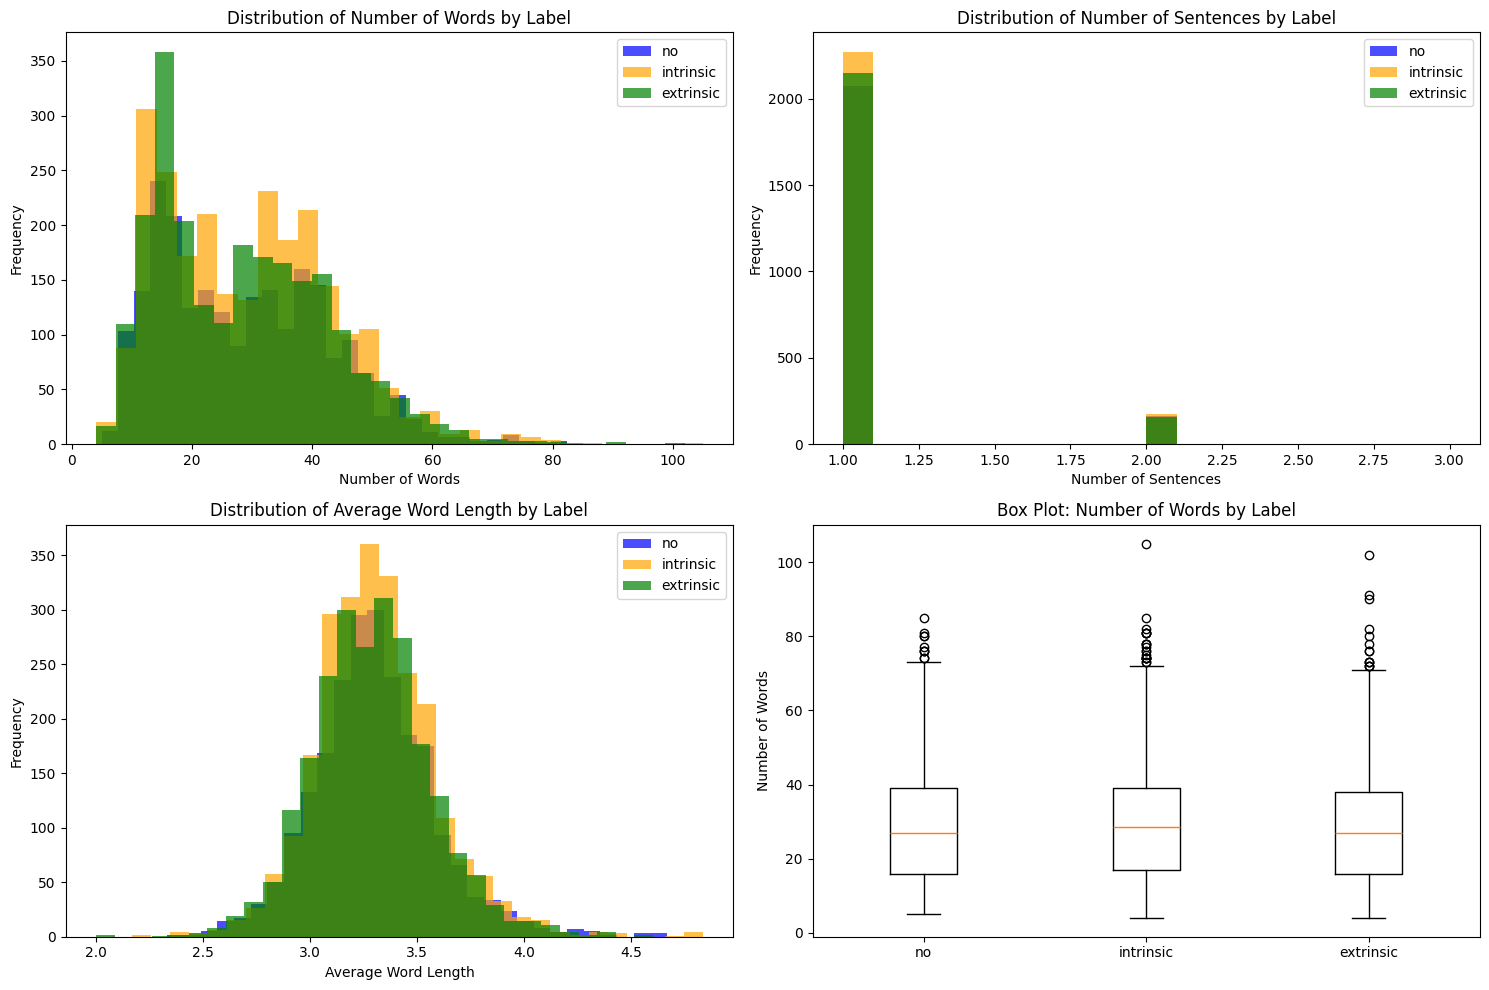

In [6]:

plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [ ]:


from nltk.tokenize import word_tokenize, sent_tokenize

for df_ in dfs:
    df_['num_words'] = df_['response'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['response'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['response'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

/tmp/ipykernel_92545/892584572.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

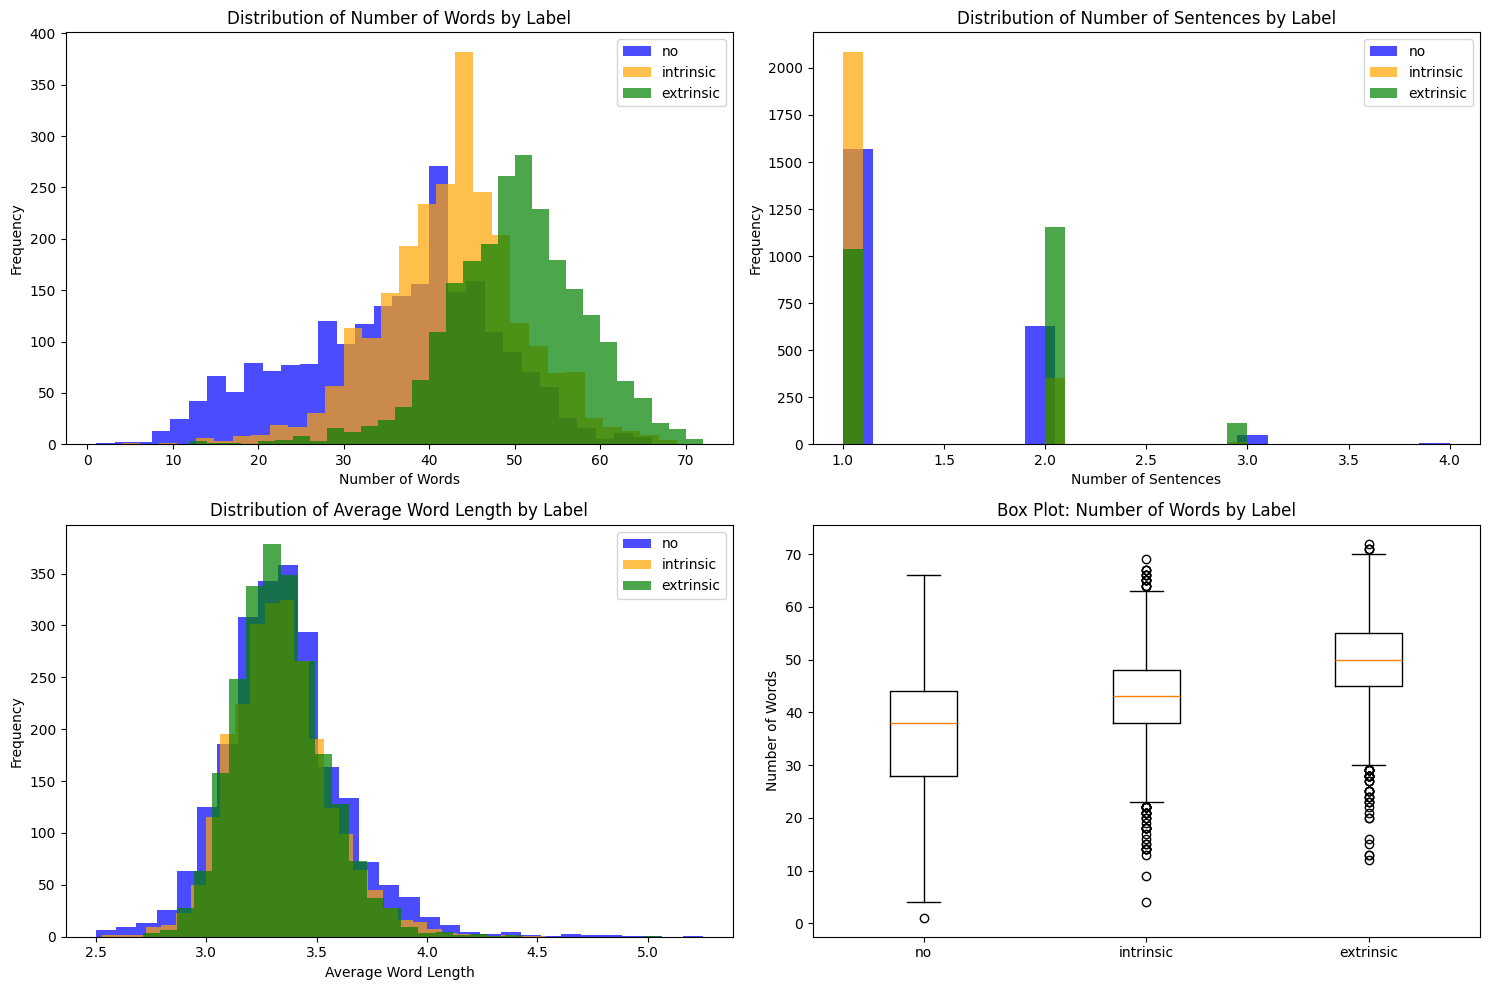

In [8]:


plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [5]:
# Choose random 20 indices from intrinsic and extrinsic dataframes
intrinsic_sample = intrinsic_df.sample(n=20, random_state=42)
extrinsic_sample = extrinsic_df.sample(n=20, random_state=42)

print("=== INTRINSIC PROMPTS (20 samples) ===")
for i, prompt in enumerate(intrinsic_sample['prompt'], 1):
    print(f"{i}. {prompt}")
    print("-" * 50)

print("\n=== EXTRINSIC PROMPTS (20 samples) ===")
for i, prompt in enumerate(extrinsic_sample['prompt'], 1):
    print(f"{i}. {prompt}")
    print("-" * 50)

=== INTRINSIC PROMPTS (20 samples) ===
1. Tông tài Tưởng Giới Thạch từ trần vào khi nàoa?
--------------------------------------------------
2. Từ khi nào thì khu vực thuộc châu Âu của Thổ Nhĩ Kỳ đã có con người sinh sống, và có đúng là họ chỉ bắt đầu canh tác nông nghiệp sau cuộc chinh phục của Alexandros Đại đế không?
--------------------------------------------------
3. Soo luong phong cách kến trúc phổ bién nhát tại nộii ô Bắc Kinh là bao nhieu?
--------------------------------------------------
4. Sau khi hai thánh Pedro và Paul tử đạo tại thành Roma, thành phố có trở thành trung tâm của đạo Hồi không, và nếu không, thì những thay đổi nào đã diễn ra?
--------------------------------------------------
5. Thập Sát Hải là tên gọi chung của các hồ nào, và có phải chúng đã được xây dựng hoàn toàn vào thời nhà Minh mà không hề có sự can thiệp từ các triều đại khác?
--------------------------------------------------
6. Tại sao các nghị sĩ, mặc dù bị kiểm soát hoàn toàn bởi các chính đảng

In [6]:
no_sample = no_df.sample(n=20, random_state=42)
print("\n=== NO PROMPTS (20 samples) ===")
for i, prompt in enumerate(no_sample['prompt'], 1):
    print(f"{i}. {prompt}")
    print("-" * 50)


=== NO PROMPTS (20 samples) ===
1. Bieen pháp nào thể hien được sự khuyến khích kinh tế lơn trong lnĩnh vực ICT??
--------------------------------------------------
2. Cơ hội nghề nghiệp nào dành cho những chuyên viên ICT mới bắt đầu và đã có kinh nghiệm, đặc biệt khi ngành công nghiệp này không yêu cầu làm việc theo nhóm và hoàn toàn không liên quan đến việc quản lý thông tin hoặc bảo mật?
--------------------------------------------------
3. Hội chợ Hàng Châu, được tổ chức hàng năm tại Quảng Châu, nổi tiếng là hội chợ thương mại đầu tiên trên thế giới. Vậy kỷ lục nào khác thuộc về sự kiện này?
--------------------------------------------------
4. Gia tộc Habsburg có thế lực như thế nào khi họ không hề bị đe dọa bởi Đế quốc Ottoman trong thế kỷ XVI và XVII?
--------------------------------------------------
5. Yêu cầu của Liên đoàn quốc tế và Ủy ban Olympic quốc tế có bao gồm việc cung cấp dịch vụ y tế chỉ vào ban ngày và không cần xe cấp cứu hiện đại tại Thế vận hội Luân Đôn 2012 kh

In [11]:
import json

no_sample.to_json(force_ascii=False)

'{"id":{"4867":"a351de38-60b7-4803-be4c-9e3f01157099","1498":"a511b5a2-4d64-422a-90fe-856b2b98e37e","4445":"2198de54-aec8-42ae-8bfd-b97d033f976b","700":"ac579177-6ddf-430a-bb85-8ed41127d840","6285":"993edac1-d8c5-4519-a375-7e5f26729457","6615":"079bec6d-473d-49ec-9898-6604450fe366","5209":"b5821f1e-78b5-4e2c-bb79-538136512700","2186":"dd669a7b-31b5-40f2-9f12-a53a271d68f4","3783":"7883b29d-d561-442b-a835-d45cc1fb028e","4861":"9bbe9b77-0f56-4464-97ed-f0ae36dbda7d","885":"00522a85-c3b9-461c-8902-41c9426e886f","4585":"a8a7d257-ab61-4dfd-84c6-8836b4d071cf","4347":"9de46d9c-e63e-413d-9ad0-321ed7823d72","2572":"6cc58cc9-0ebb-42ac-b999-7957ddd60094","6527":"040de398-b99b-40ee-8087-db67710d2355","4933":"b542c484-48a4-47fc-a78d-083f7835a33a","4252":"392db463-523c-4ca7-b425-2eab9a025fe0","6272":"544c25be-e5aa-4a65-babf-6c11ce0ebd75","4554":"36a79828-71c7-4b1d-81e4-fa7f046dda26","4852":"66966ed3-bcab-4409-9999-91c50fbd6556"},"context":{"4867":"Cụm từ ICT giờ đây cũng được sử dụng để ám chỉ đến sự 

In [12]:
intrinsic_sample.to_json(force_ascii=False)

'{"id":{"6039":"f60f86f0-10b1-4524-a1a3-cc1ef2e71ccb","4410":"1defa678-3fec-4fad-9727-50e79c2c4ca7","3821":"0643618e-8117-4097-8522-b1765eb1b353","3771":"f5a26587-4b22-4306-9b35-bf84c1cadd44","6609":"502613ed-e57f-44d3-845c-1a199ada86e9","2863":"eae9d63f-0c31-44c9-b21e-aa6ee5e4ca95","4371":"983aa7d9-cf1d-4f71-9661-673761d8cea5","2412":"72082e2e-916d-45ba-ba23-4cd8d0f993af","3118":"3d59ac29-3da2-40fe-bfd4-71878eb4e7cb","2053":"a2fcafaa-244a-435f-a1e0-3d951a9c25d7","695":"8799356f-556e-4ea7-96ed-b7b92274f411","4582":"03ad3cc9-5327-430d-b49c-1210efb56149","5360":"b0e48441-1287-47a5-af85-fe3d18f34e30","6883":"62953219-5f30-4d02-b84e-a736cfb90163","4341":"1958df57-34fb-4742-bce9-00612f815a91","3989":"17a151fa-20b3-434d-a33b-b32afe3e2131","3705":"864d0ebc-cfa6-4dab-ba3e-51a1c64f6529","1505":"4be0c891-37f3-464c-a9fb-0c4183730e1b","5698":"12a284c4-a824-475c-9a91-7cc47581457c","1464":"d37bce2f-0810-4513-a7fb-4b6d2c5676d8"},"context":{"6039":"Ngày 5 tháng 4 năm 1975, Tổng tài Tưởng Giới Thạch từ

In [13]:
extrinsic_sample.to_json(force_ascii=False)

'{"id":{"4919":"29c91054-8557-4955-a784-3ded474c6e98","1536":"6fc52f0e-47e2-45c9-a581-796c1269d203","5597":"851abb3f-4b68-41d4-90a0-79ffb0dccf2a","132":"75cbdcdb-abca-46d4-bba6-87d6d69fc868","4964":"361ab473-425d-4521-928c-ebfe7e8d20c7","3349":"290514a9-bf69-45ef-8764-1ce8d42664a7","3955":"88d88345-0fbb-4ff8-97f0-8275fff34df0","4967":"d5304d56-dae7-40d6-8ee6-f8b79f746bba","6111":"9594ea1a-471d-4e9c-a7b2-77acc376ecac","4449":"e062bbad-9550-4880-93fe-d051e1276855","4737":"3fa3073e-ffc2-43f0-9825-72c8cac3029e","1449":"8cef52c4-678d-4346-8d78-ea1432a9cc98","4186":"cb675003-f390-451e-a47c-b3d22c393051","679":"e4423dc6-0cdf-4894-97a4-5b93343ae8e6","4676":"104312da-9c64-41a1-8475-30a5ccbe9717","1523":"8ee900e0-7fa5-4cc9-8df0-065eeb3d8c07","5570":"e93692b8-d22f-4d7d-b349-50189706f172","911":"18b40eb4-3e8d-445e-af1b-aaba3252c06b","2505":"b4e81846-8a2b-40f2-9c47-5ec2ee84e2fe","1469":"824b34bf-947b-44fd-85a2-f0e07e3b6b13"},"context":{"4919":"Âm nhạc dân gian truyền thống Síp có nhiều điểm chung v